In [1]:
import numpy as np
import pandas as pd
import os
current_dir = os.path.abspath(os.getcwd())

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [4]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join(current_dir + '\\Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join(current_dir + '\\Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [5]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1)

In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

# Arquitetura do modelo

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks = [ModelCheckpoint(filepath='model_reg.keras', save_best_only=True)]

history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, callbacks = callbacks)

Epoch 1/50
83/83 [==============================] - 169s 2s/step - loss: 2.0508 - accuracy: 0.2951 - val_loss: 1.3622 - val_accuracy: 0.2721
Epoch 2/50
83/83 [==============================] - 161s 2s/step - loss: 1.3532 - accuracy: 0.2902 - val_loss: 1.3700 - val_accuracy: 0.2891
Epoch 3/50
83/83 [==============================] - 168s 2s/step - loss: 1.3535 - accuracy: 0.2891 - val_loss: 1.3776 - val_accuracy: 0.2789
Epoch 4/50
83/83 [==============================] - 169s 2s/step - loss: 1.3356 - accuracy: 0.3212 - val_loss: 1.3567 - val_accuracy: 0.4014
Epoch 5/50
83/83 [==============================] - 166s 2s/step - loss: 1.2042 - accuracy: 0.4449 - val_loss: 1.0026 - val_accuracy: 0.5646
Epoch 6/50
83/83 [==============================] - 162s 2s/step - loss: 0.9293 - accuracy: 0.6050 - val_loss: 1.0521 - val_accuracy: 0.5442
Epoch 7/50
83/83 [==============================] - 165s 2s/step - loss: 0.8089 - accuracy: 0.6474 - val_loss: 0.7751 - val_accuracy: 0.6633
Epoch 8/50
83

# Resultados

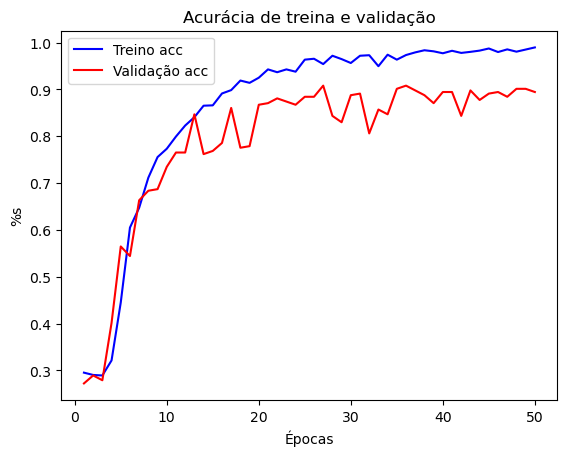

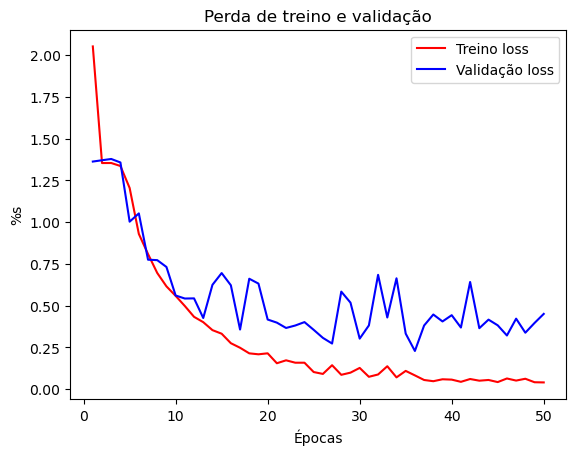

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'b', label = 'Treino acc')
plt.plot(epochs, val_accuracy, 'r', label = 'Validação acc')
plt.xlabel('Épocas')
plt.ylabel('%s')
plt.title('Acurácia de treina e validação')
plt.legend()
plt.figure()


loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'r', label = 'Treino loss')
plt.plot(epochs, val_loss, 'b', label = 'Validação loss')
plt.xlabel('Épocas')
plt.ylabel('%s')
plt.title('Perda de treino e validação')
plt.legend()
plt.figure()
plt.show()